# 1. Collect data

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Fuel prices

In [3]:
jun19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-06-2019.csv')
jul19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-07-2019.csv')
aug19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-08-2019.csv')
sep19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-09-2019.csv')
oct19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-10-2019.csv')
nov19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-11-2019.csv')
dec19 = pd.read_csv('data/fuelwatch/FuelWatchRetail-12-2019.csv')

jan20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-01-2020.csv')
feb20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-02-2020.csv')
mar20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-03-2020.csv')
apr20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-04-2020.csv')
may20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-05-2020.csv')
jun20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-06-2020.csv')
jul20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-07-2020.csv')
aug20 = pd.read_csv('data/fuelwatch/FuelWatchRetail-08-2020.csv')

In [4]:
fuel_prices_df = pd.concat([jun19, jul19, aug19, sep19, oct19, nov19, dec19, jan20, feb20, mar20, apr20, may20, jun20, jul20, aug20])

In [5]:
fuel_prices_df.tail()

,PUBLISH_DATE,TRADING_NAME,BRAND_DESCRIPTION,PRODUCT_DESCRIPTION,PRODUCT_PRICE,ADDRESS,LOCATION,POSTCODE,AREA_DESCRIPTION,REGION_DESCRIPTION,Unnamed: 10
54566,21/08/2020,Windmill Roadhouse,Liberty,Diesel,115.9,1 Darch St,REGANS FORD,6507,Regans Ford,Wheatbelt,NaN
54567,21/08/2020,Yarrumba Service Station,Liberty,ULP,134.8,21 Jose St,MULLEWA,6630,Geraldton,Mid-West,NaN
54568,21/08/2020,Yarrumba Service Station,Liberty,Diesel,135.7,21 Jose St,MULLEWA,6630,Geraldton,Mid-West,NaN
54569,21/08/2020,Young Siding General Store,BP,ULP,122.2,19 Station St,YOUNGS SIDING,6330,Albany,Great Southern,NaN
54570,21/08/2020,Young Siding General Store,BP,Diesel,127.4,19 Station St,YOUNGS SIDING,6330,Albany,Great Southern,NaN


In [6]:
fuel_prices_df['AREA_DESCRIPTION'].unique().tolist()[:5]

['Murray', 'South of River', 'North of River', 'Mandurah', 'East/Hills']

In [7]:
# Get only Location = Armadale prices
mask = (fuel_prices_df.loc[:, 'LOCATION'] == 'ARMADALE') & (fuel_prices_df.loc[:, 'PRODUCT_DESCRIPTION'] == 'ULP')
fuel_prices_df_arm = fuel_prices_df[mask]

In [8]:
# Change the dates to datetime format
fuel_prices_df_arm.loc[:, 'PUBLISH_DATE'] = pd.to_datetime(fuel_prices_df_arm.loc[:, 'PUBLISH_DATE'], format='%d/%m/%Y')

In [9]:
fuel_prices_df_arm.head()

,PUBLISH_DATE,TRADING_NAME,BRAND_DESCRIPTION,PRODUCT_DESCRIPTION,PRODUCT_PRICE,ADDRESS,LOCATION,POSTCODE,AREA_DESCRIPTION,REGION_DESCRIPTION,Unnamed: 10
55,2019-06-01,7-Eleven Haynes,7-Eleven,ULP,141.9,1256 Armadale Rd,ARMADALE,6112,South of River,Metro,NaN
134,2019-06-01,BP 2go Armadale,BP,ULP,141.9,3249 Albany Hwy,ARMADALE,6112,South of River,Metro,NaN
1403,2019-06-01,Coles Express Brookdale,Coles Express,ULP,141.9,131 Eighth Rd,ARMADALE,6112,South of River,Metro,NaN
1921,2019-06-01,Puma Armadale Central,Puma,ULP,143.7,Cnr Neerigan St & Third Rd,ARMADALE,6112,South of River,Metro,NaN
2219,2019-06-01,Shell Armadale,Shell,ULP,142.9,269 South Western Hwy (Cnr Dickens Pl),ARMADALE,6112,South of River,Metro,NaN


In [10]:
fuel_prices_df_arm_daily_mean = fuel_prices_df_arm.groupby('PUBLISH_DATE')['PRODUCT_PRICE'].mean().reset_index()
fuel_prices_df_arm_daily_mean

,PUBLISH_DATE,PRODUCT_PRICE
0,2019-06-01,141.900000
1,2019-06-02,139.900000
2,2019-06-03,134.614286
3,2019-06-04,147.414286
4,2019-06-05,147.671429
...,...,...
435,2020-08-17,105.357143
436,2020-08-18,103.300000
437,2020-08-19,131.042857
438,2020-08-20,134.557143


In [11]:
fuel_prices_df_arm_daily_min = fuel_prices_df_arm.groupby('PUBLISH_DATE')['PRODUCT_PRICE'].min().reset_index()
fuel_prices_df_arm_daily_min

,PUBLISH_DATE,PRODUCT_PRICE
0,2019-06-01,139.7
1,2019-06-02,136.9
2,2019-06-03,130.9
3,2019-06-04,135.7
4,2019-06-05,139.7
...,...,...
435,2020-08-17,103.3
436,2020-08-18,101.7
437,2020-08-19,101.7
438,2020-08-20,133.3


(array([737241., 737303., 737364., 737425., 737485., 737546., 737607.,
        737669.]),
 <a list of 8 Text xticklabel objects>)

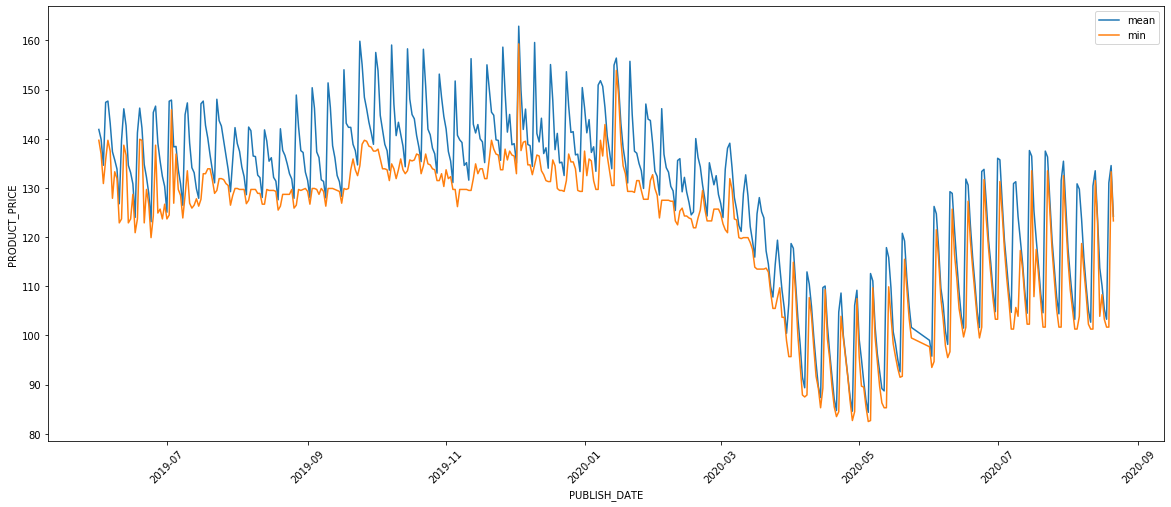

In [12]:
plt.figure(figsize=(20,8))
sns.lineplot(x='PUBLISH_DATE', y='PRODUCT_PRICE', data=fuel_prices_df_arm_daily_mean, label='mean')
sns.lineplot(x='PUBLISH_DATE', y='PRODUCT_PRICE', data=fuel_prices_df_arm_daily_min, label='min')
plt.legend()
plt.xticks(rotation=45)

In [13]:
# This is the file to get used later
fuel_prices_df_arm_daily_mean_out = fuel_prices_df_arm_daily_mean
fuel_prices_df_arm_daily_mean_out.rename(columns = {'PUBLISH_DATE':'Date', 'PRODUCT_PRICE':'mean_fuel_price'}, inplace = True) 

## Oil prices

In [14]:
oil = pd.read_csv('data/oil/New_York_Harbor_Conventional_Gasoline_Regular_Spot_Price_FOB.csv', skiprows=5, names=["Date","Oil_price"])

In [15]:
oil.head()

,Date,Oil_price
0,08/17/2020,1.258
1,08/14/2020,1.234
2,08/13/2020,1.223
3,08/12/2020,1.223
4,08/11/2020,1.173


In [16]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8604 entries, 0 to 8603
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8604 non-null   object 
 1   Oil_price  8604 non-null   float64
dtypes: float64(1), object(1)
memory usage: 134.6+ KB


In [17]:
# Change the dates to datetime format
oil.loc[:, 'Date'] = pd.to_datetime(oil.loc[:, 'Date'], format='%m/%d/%Y')

In [18]:
# Remove all data before 2019-06-01
mask = oil['Date'] >= np.datetime64('2019-06-01')
oil_df = oil[mask]
oil_df

,Date,Oil_price
0,2020-08-17,1.258
1,2020-08-14,1.234
2,2020-08-13,1.223
3,2020-08-12,1.223
4,2020-08-11,1.173
...,...,...
298,2019-06-07,1.677
299,2019-06-06,1.663
300,2019-06-05,1.629
301,2019-06-04,1.639


(array([737241., 737303., 737364., 737425., 737485., 737546., 737607.,
        737669.]),
 <a list of 8 Text xticklabel objects>)

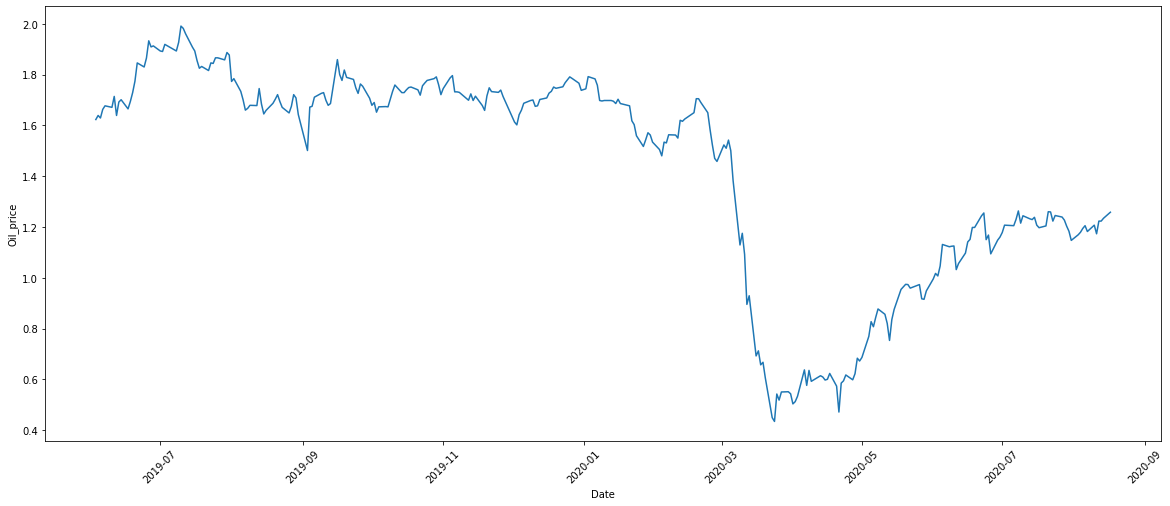

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Oil_price', data=oil_df)
plt.xticks(rotation=45)

In [20]:
plt.figure()
sns.lineplot(x='PUBLISH_DATE', y='PRODUCT_PRICE', data=fuel_prices_df_arm_daily_mean, label='Mean fuel price Armadale')
sns.lineplot(x='Date', y='Oil_price', data=oil_df, label='Oil price')
plt.legend()

ValueError: Could not interpret input 'PUBLISH_DATE'

In [21]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()

sns.lineplot(ax=ax1, x='PUBLISH_DATE', y='PRODUCT_PRICE', data=fuel_prices_df_arm_daily_mean, label='Mean fuel price Armadale')
sns.lineplot(ax=ax2, x='Date', y='Oil_price', data=oil_df, label='Oil price', color='red')

ax1.set_xlabel('Date')
ax1.set_ylabel('Fuel price (c)')
ax2.set_ylabel('Oil price (~)')

plt.xticks(rotation=45)

plt.show()

ValueError: Could not interpret input 'PUBLISH_DATE'

## Exchange rate

In [22]:
df_usd_aud = pd.read_csv('data/currency/AUD_USD Historical Data.csv')
df_usd_aud.head()

,Date,Price,Open,High,Low,Change %
0,"Aug 21, 2020",0.7161,0.7193,0.7217,0.7139,-0.42%
1,"Aug 20, 2020",0.7191,0.7181,0.7204,0.7135,0.14%
2,"Aug 19, 2020",0.7181,0.7243,0.7276,0.7179,-0.81%
3,"Aug 18, 2020",0.7240,0.7214,0.7265,0.7208,0.36%
4,"Aug 17, 2020",0.7214,0.7164,0.7229,0.7160,0.60%


In [23]:
df_usd_aud.tail()

,Date,Price,Open,High,Low,Change %
338,"May 07, 2019",0.7014,0.6992,0.7050,0.6982,0.34%
339,"May 06, 2019",0.6990,0.6980,0.7003,0.6961,-0.48%
340,"May 03, 2019",0.7024,0.7003,0.7025,0.6983,0.34%
341,"May 02, 2019",0.7000,0.7015,0.7029,0.6993,-0.23%
342,"May 01, 2019",0.7016,0.7049,0.7064,0.7006,-0.47%


In [24]:
df_usd_aud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      343 non-null    object 
 1   Price     343 non-null    float64
 2   Open      343 non-null    float64
 3   High      343 non-null    float64
 4   Low       343 non-null    float64
 5   Change %  343 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [25]:
# Change date to date type
df_usd_aud.loc[:, 'Date'] = pd.to_datetime(df_usd_aud.loc[:, 'Date'], format='%b %d, %Y')
df_usd_aud.head()

,Date,Price,Open,High,Low,Change %
0,2020-08-21,0.7161,0.7193,0.7217,0.7139,-0.42%
1,2020-08-20,0.7191,0.7181,0.7204,0.7135,0.14%
2,2020-08-19,0.7181,0.7243,0.7276,0.7179,-0.81%
3,2020-08-18,0.7240,0.7214,0.7265,0.7208,0.36%
4,2020-08-17,0.7214,0.7164,0.7229,0.7160,0.60%


In [26]:
df_usd_aud.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

In [27]:
df_usd_aud.drop(['Open', 'High', 'Low', 'Change %'], axis=1, inplace=True)

In [28]:
df_usd_aud.rename(columns={"Price": "usd_aud"}, inplace=True)
df_usd_aud.head()

,Date,usd_aud
0,2020-08-21,0.7161
1,2020-08-20,0.7191
2,2020-08-19,0.7181
3,2020-08-18,0.7240
4,2020-08-17,0.7214


## Merge to create a single dataframe

In [44]:
# Create a range of dates from 2019, 5, 1 to last gathered fuel price
base = datetime.datetime(2019, 6, 1)
data_rage = np.array([base + datetime.timedelta(days=i) for i in range(448)])
data_rage[-5:]

array([datetime.datetime(2020, 8, 17, 0, 0),
       datetime.datetime(2020, 8, 18, 0, 0),
       datetime.datetime(2020, 8, 19, 0, 0),
       datetime.datetime(2020, 8, 20, 0, 0),
       datetime.datetime(2020, 8, 21, 0, 0)], dtype=object)

In [45]:
# Create dataframe with date range
df = pd.DataFrame({'Date':data_rage})

In [46]:
# Add in exchange rate
df = df.merge(df_usd_aud, how='left')
df.tail(7)

,Date,usd_aud
441,2020-08-15,NaN
442,2020-08-16,NaN
443,2020-08-17,0.7214
444,2020-08-18,0.7240
445,2020-08-19,0.7181
446,2020-08-20,0.7191
447,2020-08-21,0.7161


In [47]:
# Add in minimum south of river fuel price
df = df.merge(fuel_prices_df_arm_daily_mean_out, how='left')
df.tail(7)

,Date,usd_aud,mean_fuel_price
441,2020-08-15,NaN,113.728571
442,2020-08-16,NaN,110.128571
443,2020-08-17,0.7214,105.357143
444,2020-08-18,0.7240,103.300000
445,2020-08-19,0.7181,131.042857
446,2020-08-20,0.7191,134.557143
447,2020-08-21,0.7161,124.242857


In [48]:
# Add in oil price
df = df.merge(oil_df, how='left')
df.tail(7)

,Date,usd_aud,mean_fuel_price,Oil_price
441,2020-08-15,NaN,113.728571,NaN
442,2020-08-16,NaN,110.128571,NaN
443,2020-08-17,0.7214,105.357143,1.258
444,2020-08-18,0.7240,103.300000,NaN
445,2020-08-19,0.7181,131.042857,NaN
446,2020-08-20,0.7191,134.557143,NaN
447,2020-08-21,0.7161,124.242857,NaN


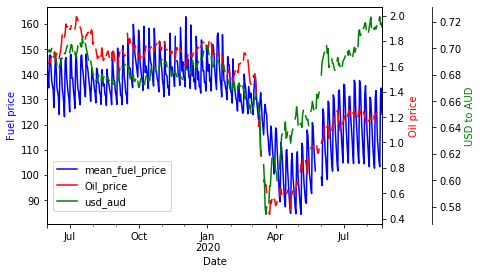

In [49]:
# Let's plot the raw data
ax = df.plot(x="Date", y="mean_fuel_price", legend=False, color="b")
ax2 = ax.twinx()
df.plot(x="Date", y="Oil_price", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
df.plot(x="Date", y="usd_aud", ax=ax3, legend=False, color="g")

ax.set_xlabel("Date")
ax.set_ylabel("Fuel price")
ax2.set_ylabel("Oil price")
ax3.set_ylabel("USD to AUD")

ax.yaxis.label.set_color(color="b")
ax2.yaxis.label.set_color(color="r")
ax3.yaxis.label.set_color(color="g")

ax.figure.legend(bbox_to_anchor=(0.11, 0.2), loc='lower left')
plt.show()

In [50]:
df.to_pickle('data.pkl')
print('Data saved.')

Data saved.
